In [37]:
!pip install scikit-learn joblib streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/14/92/095c67f3d17b6116c2b1882bb5ac719939154ee5bc7e7610ee325159a101/streamlit-1.48.0-py3-none-any.whl.metadata
  Using cached streamlit-1.48.0-py3-none-any.whl.metadata (9.5 kB)
  Obtaining dependency information for altair!=5.4.0,!=5.4.1,<6,>=4.0 from https://files.pythonhosted.org/packages/aa/f3/0b6ced594e51cc95d8c1fc1640d3623770d01e4969d29c0bd09945fafefa/altair-5.5.0-py3-none-any.whl.metadata
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for blinker<2,>=1.5.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Obtaining dependency information for click<9,>=7.0 from https://files.pythonhosted.org/packages/85/32/10bb5764d90a8eee674e9dc6f4db6a0ab47c8c4d0d83c27f7c39ac415a4d/click-8.


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import joblib
%matplotlib inline

In [3]:
insurance=pd.read_csv('insurance.csv')

In [4]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

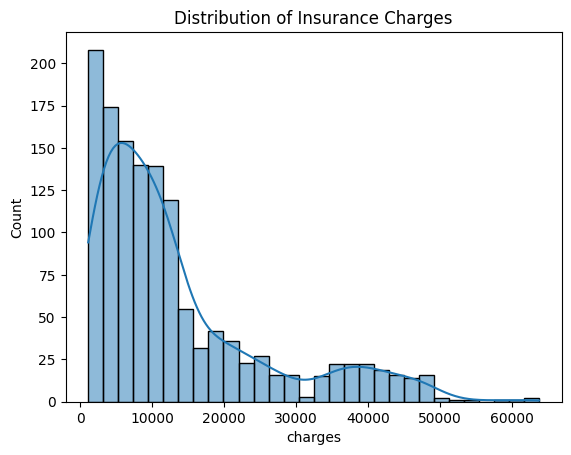

In [9]:
sns.histplot(insurance['charges'],kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

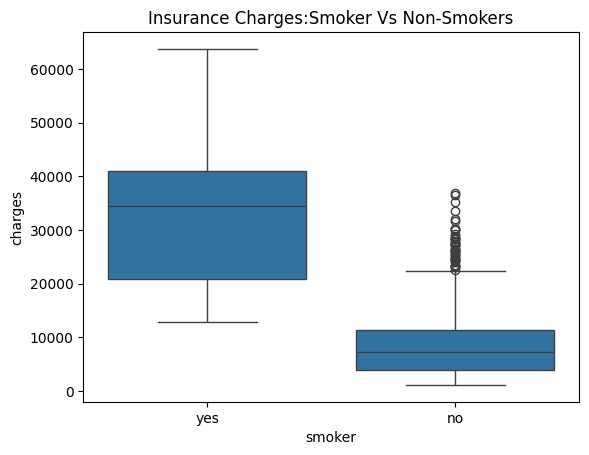

In [10]:
sns.boxplot(x='smoker',y='charges',data=insurance)
plt.title("Insurance Charges:Smoker Vs Non-Smokers")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
Categoricals=['sex','smoker','region']
for cat in Categoricals:
    print(f"Column: {cat}")
    print(insurance[cat].value_counts)
    print("-"*40)

Column: sex
<bound method IndexOpsMixin.value_counts of 0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object>
----------------------------------------
Column: smoker
<bound method IndexOpsMixin.value_counts of 0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object>
----------------------------------------
Column: region
<bound method IndexOpsMixin.value_counts of 0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object>
----------------------------------------


In [14]:
for cat in Categoricals:
    le=LabelEncoder()
    insurance[cat]=le.fit_transform(insurance[cat])

In [15]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [19]:
X=insurance.drop('charges',axis=1)
Y=insurance['charges']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("R2 Score: ",r2_score(y_test,y_pred))

Mean Absolute Error:  4186.508898366432
Mean Squared Error:  33635210.431178406
R2 Score:  0.7833463107364539


In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly.fit_transform(x_train)#convert x to [x,x^2]

In [28]:
from sklearn.linear_model  import LinearRegression
model=LinearRegression()
model.fit(x_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
x_test_poly=poly.transform(x_test)
y_pred=model.predict(x_test_poly)

In [36]:
print("Polynomial Mean Squared Error: ",mean_squared_error(y_pred,y_test))
print("Polynomial Absolute Error: ",mean_absolute_error(y_pred,y_test))
print("Polynomisal R2 SCORE: ", r2_score(y_pred,y_test))

Polynomial Mean Squared Error:  20530608.94295193
Polynomial Absolute Error:  2730.3155816804338
Polynomisal R2 SCORE:  0.8519993441149593


In [39]:
import joblib

In [40]:
label_encoders={}
for cat in ['sex','smoker','region']:
    le=LabelEncoder()
    le.fit(insurance[cat])
    label_encoders[cat]=le
joblib.dump(label_encoders,'label_encoders.pkl')
poly=PolynomialFeatures(degree=2,include_bias=False)
poly.fit(x_train)
joblib.dump(poly,'poly_transformer.pkl')
joblib.dump(lr,'linear_model.pkl')
joblib.dump(model,'poly_model.pkl')

['poly_model.pkl']

In [42]:
print("Original feature order:", x_train.columns.tolist())

Original feature order: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [43]:
# Check what values your encoders expect
print("Sex classes:", label_encoders['sex'].classes_)
print("Smoker classes:", label_encoders['smoker'].classes_)
print("Region classes:", label_encoders['region'].classes_)

Sex classes: [0 1]
Smoker classes: [0 1]
Region classes: [0 1 2 3]
